# Homework 2
#### EE-556 Mathematics of Data - Fall 2024

This homework covers Lectures 8-12. Please take a look at the material for the context and notation.

In this homework we will study minimax problems. We will begin with some theoretical analysis and in a second part you will implement a Wasserstein Generative Adversarial Network (WGAN). 

These notebooks should expose you to the fundamentals of GAN training at a basic level, as well as some of the theory behind it.

## 1. Minimax problems - 65 points

### 1.1 Theoretical recap: stationary points and convergence in minmax games - 25 points

Consider a stylized function $f: \mathbb{R}^2 \to \mathbb{R}$, such that we have $f(x, y)=(ax-b)(ay-c)$ for some $a \neq 0,b,c$.

__(1)__ (5 points) Write down the first-order stationary points of $f$, and
        classify them as local minimum, local maximum, or saddle point by
        inspecting its Hessian.




We have the partial derivatives:
$$
\frac{\partial f}{\partial x} = a(ay - c),
$$
$$
\frac{\partial f}{\partial y} = a(ax - b).
$$
Stationary points occur only where both partial derivatives are zero, thus we set 
$\frac{\partial f}{\partial x} = 0$ and $\frac{\partial f}{\partial y} = 0$:

$$
a(ay - c) = 0 \implies ay - c = 0 \implies y = \frac{c}{a},
$$
$$
a(ax - b) = 0 \implies ax - b = 0 \implies x = \frac{b}{a}.
$$

Thus, the only stationary point is 

$$
\left( \frac{b}{a}, \frac{c}{a} \right).
$$

$H$ consists of second-order partial derivatives of $f$:

$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}.
$$
Here
$$
\frac{\partial^2 f}{\partial x^2} = \frac{\partial}{\partial x} \left( a(ay - c) \right) = 0,
$$
$$
\frac{\partial^2 f}{\partial y^2} = \frac{\partial}{\partial y} \left( a(ax - b) \right) = 0,
$$
$$
\frac{\partial^2 f}{\partial x \partial y} = \frac{\partial}{\partial x} \left( a(ax - b) \right) = a^2,
$$
$$
\frac{\partial^2 f}{\partial y \partial x} = \frac{\partial}{\partial y} \left( a(ay - c) \right) = a^2.
$$

The Hessian matrix becomes:

$$
H = \begin{bmatrix}
0 & a^2 \\
a^2 & 0
\end{bmatrix}.
$$

We find eigenvalues as 

$$
\det(H - \lambda I) = \det \begin{bmatrix}
-\lambda & a^2 \\
a^2 & -\lambda
\end{bmatrix} = 0.
$$
$$
\lambda^2 - a^4 = 0 \implies \lambda = \pm a^2.
$$

The eigenvalues are $a^2 > 0$ and $-a^2 < 0$ and have opposite signs, 
thus, the stationary point $\left( \frac{b}{a}, \frac{c}{a} \right)$ is a **saddle point**.

__(2)__ (5 points) Find the solution $(x^\star,y^\star)$ to the
        minimax problem $\min_x \max_y f(x, y)$. You can quantify the solution
        by using the following saddle point inequality:  $f(x^\star, y^\star)
        \geq f(x^\star, y)$ and $f(x^\star, y^\star) \leq f(x, y^\star)$, for
        all $x, y$.
        
**HINT:** $(x^\star, y^\star)$ can only be one of the critical points you found in (1), just evaluate $f$ at every place in the inequalities to check the optimality!




$$
f\left(\frac{b}{a}, \frac{c}{a}\right) = \left(a\frac{b}{a} - b\right)\left(a\frac{c}{a} - c\right) = (b - b)(c - c) = 0.
$$
For fixed $x^\star = \frac{b}{a}$, let $y$ vary:

$$
f\left(\frac{b}{a}, y\right) = \left(a\frac{b}{a} - b\right)(ay - c) = (b - b)(ay - c) = 0.
$$

Thus, for any $y$:

$$
f(x^\star, y^\star) = 0 \geq f(x^\star, y) = 0.
$$

By the symmetry we have the same for $x$
$$
f\left(x, \frac{c}{a}\right) = (ax - b)\left(a\frac{c}{a} - c\right) = (ax - b)(c - c) = 0.
$$
$$f(x^\star, y^\star) = 0 \leq f(x, y^\star) = 0.$$
Thus point $(x^\star, y^\star) = \left(\frac{b}{a}, \frac{c}{a}\right)$ satisfies the saddle point inequality and it is the solution to the minimax problem.

__(3)__ (15 points) One possible attempt at finding this solution via iterative
        first-order methods is to perform gradient updates on the variables $x$
        and $y$. More precisely for $\gamma > 0$ consider the simultaneous gradient
        descent/ascent updates
        
\begin{equation}
    x_{k+1} = x_k - \gamma \nabla_x f(x_k, y_k), \qquad
    y_{k+1} = y_k + \gamma \nabla_y f(x_k, y_k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x_k, y_k \}_{k=0}^\infty$ starting
from any point $(x_0, y_0) \neq (x^\star, y^\star)$ diverges, for any $\gamma > 0$.
Find the rate at which the distance from 
$(x^\star,y^\star)$ to the sequence $\{x_k, y_k \}$ grows as the number of iterations $k$ increases.

**HINT:** Define $d_k^2=||(x_k,y_k)-(x^\star, y^\star)||_2^2$ as the sequence of squared distances to the optimum. If you find a formula for how $d_{k+1}$ depends on $d_k$ using the exact gradient updates for our $f$, you can easily argue for the divergence and the rate.

We have 
$$
x_{k+1} = x_k - \gamma a(ay_k - c), \quad
y_{k+1} = y_k + \gamma a(ax_k - b).
$$
And so the errors are
$$
\Delta x_{k+1} = x_{k+1} - x^\star = x_k - x^\star - \gamma a(ay_k - c).
$$
Using $y_k - y^\star = \Delta y_k$ and $c = ay^\star$:
$$
\Delta x_{k+1} = \Delta x_k - \gamma a^2 \Delta y_k.
$$
Similarly:

$$
\Delta y_{k+1} = y_{k+1} - y^\star = y_k - y^\star + \gamma a(ax_k - b).
$$

Using $x_k - x^\star = \Delta x_k$ and $b = ax^\star$:

$$
\Delta y_{k+1} = \Delta y_k + \gamma a^2 \Delta x_k.
$$
Thus, the updates are:

$$
\begin{bmatrix}
\Delta x_{k+1} \\
\Delta y_{k+1}
\end{bmatrix}
=
\begin{bmatrix}
1 & -\gamma a^2 \\
\gamma a^2 & 1
\end{bmatrix}
\begin{bmatrix}
\Delta x_k \\
\Delta y_k
\end{bmatrix}.
$$

Let $\mathbf{z}_k = \begin{bmatrix} \Delta x_k \\ \Delta y_k \end{bmatrix}$. The updates can be written as:

$$
\mathbf{z}_{k+1} = M \mathbf{z}_k, \quad
M = \begin{bmatrix}
1 & -\gamma a^2 \\
\gamma a^2 & 1
\end{bmatrix}.
$$

The squared distance $d_k^2$ is just the norm of $\mathbf{z}_k$:

$$
d_k^2 = \|\mathbf{z}_k\|_2^2.
$$
Thus we have 
$$
d_{k+1}^2 = \|M \mathbf{z}_k\|_2^2 = \mathbf{z}_k^\top M^\top M \mathbf{z}_k.
$$
And so we compute the $ M^\top M$:
$$
M^\top = \begin{bmatrix}
1 & \gamma a^2 \\
-\gamma a^2 & 1
\end{bmatrix}, \quad
M^\top M = \begin{bmatrix}
1 + (\gamma a^2)^2 & 0 \\
0 & 1 + (\gamma a^2)^2
\end{bmatrix}.
$$

Which gives 
$$
d_{k+1}^2 = \mathbf{z}_k^\top M^\top M \mathbf{z}_k = (1 + (\gamma a^2)^2)\|\mathbf{z}_k\|_2^2 = (1 + (\gamma a^2)^2)d_k^2.
$$

This shows that the squared distance grows geometrically with a factor of $1 + (\gamma a^2)^2 > 1$ for $\gamma>0$, 
and thus the gradient descent sequence diverges.

__(Optional $\star$)__ A second attempt at finding the solution via _alternating_ gradient descent ascent on $x$
        and $y$. More precisely for $\gamma > 0$ consider the update
        
\begin{equation}
    x_{k+1} = x_k - \gamma \nabla_x f(x_k, y_k), \qquad
    y_{k+1} = y_k + \gamma \nabla_y f(x_{k+1}, y_k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x_k, y_k \}_{k=0}^\infty$ starting
from any point $(x_0, y_0) \neq (x^\star, y^\star)$ i) never converges, ii) but still remains bounded under certain stepsize conditions.

**HINT**: Reduce the problem to studying a linear system.




Using the gradients computed earlier:
$$
\begin{aligned}
x_{k+1} &= x_k - \gamma (a^2 y_k - a c), \\
y_{k+1} &= y_k + \gamma (a^2 x_{k+1} - a b).
\end{aligned}
$$
Let's shift the coordinates to center around the saddle point
\begin{aligned}
u_k &= x_k - x^\star = x_k - \frac{b}{a}, \\
v_k &= y_k - y^\star = y_k - \frac{c}{a}.
\end{aligned}
Thus
\begin{aligned}
x_{k+1} &= \frac{b}{a} + u_{k+1} = \frac{b}{a} + u_k - \gamma a^2 v_k, \\
y_{k+1} &= \frac{c}{a} + v_{k+1} = \frac{c}{a} + v_k + \gamma a^2 u_{k+1}.
\end{aligned}
\begin{aligned}
u_{k+1} &= u_k - \gamma a^2 v_k, \\
v_{k+1} &= v_k + \gamma a^2 u_{k+1} = v_k + \gamma a^2 (u_k - \gamma a^2 v_k).
\end{aligned}

$$
u_{k+1} = u_k - \gamma a^2 v_k, 
$$
$$
v_{k+1} = \gamma a^2 u_k + (1 - \gamma^2 a^4) v_k.
$$

We thus represent the system in the matrix form:
$$
\begin{bmatrix}
u_{k+1} \\
v_{k+1}
\end{bmatrix}
=
\begin{bmatrix}
1 & -\gamma a^2 \\
\gamma a^2 & 1 - \gamma^2 a^4
\end{bmatrix}
\begin{bmatrix}
u_k \\
v_k
\end{bmatrix}
= M \cdot 
\begin{bmatrix}
u_k \\
v_k
\end{bmatrix}
$$

It is needed to analyse the matrix in order to derive the convergency. In particular, we are interested in eigenvalues of $M$
Compute the determinant:

\begin{align}
\det(M - \lambda I) &= 
\begin{vmatrix}
1 - \lambda & -\gamma a^2 \\
\gamma a^2 & 1 - \gamma^2 a^4 - \lambda
\end{vmatrix} \\
&= (1 - \lambda)(1 - \gamma^2 a^4 - \lambda) - (-\gamma a^2)(\gamma a^2) \\
&= (1 - \lambda)(1 - \gamma^2 a^4 - \lambda) + \gamma^2 a^4.
\end{align}

We thus have the characteristic equation 
$$
\lambda^2 + (\gamma^2 a^4 - 2)\lambda + 1 = 0.
$$
Let’s examine the discriminant $ \Delta $:
$$
\Delta = (\gamma^2 a^4 - 2)^2 - 4.
$$
For $ 0 < \gamma < \frac{2}{a^2} $:
$$
\gamma^2 a^4 < 4 \quad \Rightarrow \quad \gamma^2 a^4 - 2 < 2 \quad \Rightarrow \Delta < 0.
$$
When $ \Delta < 0 $ the eigenvalues are complex conjugates:
$$
\lambda = \frac{2 - \gamma^2 a^4}{2} \pm i \frac{\sqrt{4 \gamma^2 a^4 - \gamma^4 a^8}}{2}.
$$
We note that 
$$
|\lambda|^2=\frac{4-4\gamma^2 a^4+\gamma^4 a^8+4\gamma^2 a^4-\gamma^4 a^8}{4}=1.
$$
Since the eigenvalues lie on the unit circle $( |\lambda| = 1 )$ and are complex conjugates, the iterates $ \{u_k, v_k\} $ (and hence $ \{x_k, y_k\} )$ will exhibit oscillatory behavior without converging to the saddle point $ (x^\star, y^\star) $ unless the initial point is exactly the saddle point.

We thus have only 3 different cases for the sequence of points:

1. For $ 0 < \gamma < \frac{2}{a^2} $: Eigenvalues are complex with $ |\lambda| = 1 $ The iterates will cycle indefinitely without growing unbounded.
    
2. At $ \gamma = \frac{2}{a^2} $: The discriminant $ \Delta = 0 $ leading to a repeated real eigenvalue $ \lambda = -1 $. The system alternates between two states, still bounded but oscillating more drastically.
    
3. For $ \gamma > \frac{2}{a^2} $ : The discriminant $ \Delta > 0 $ , resulting in real eigenvalues. One eigenvalue will have $ |\lambda| > 1 $ , leading to divergence of the iterates.

Thus, choosing the step size $ \gamma $ such that $ 0 < \gamma < \frac{2}{a^2} $ ensures that the iterates remain bounded.


### 1.2 A concrete example: Rock - Paper - Scissors - Lizard - Spock - 40 points

To make your previous abstract analysis more concrete, we will now look at the iconic Rock-Paper-Scissors-Lizard-Spock game. Sheldon and Leonard always like to settle their differences through a round of this game, whose rules they state as follows:

*"Scissors cuts Paper, Paper covers Rock, Rock crushes Lizard, Lizard poisons Spock, Spock smashes Scissors, Scissors decapitates Lizard, Lizard eats Paper, Paper disproves Spock, Spock vaporizes Rock, (and as it always has) Rock crushes Scissors"*

Sheldon and Leonard always pick to play Spock because "logic trumps all", it will be your task to show that this is not the optimal strategy.

We can formalize the game as follows. There are two players, the `x` player (e.g. Sheldon) and the `y` player (e.g. Leonard). There is only one single round. The players play a randomized strategy: each player chooses a probability of playing rock/paper/scissors/lizard/Spock. We look at the expected pay-off of these randomized strategies. 

In other words, the players choose an element in $\Delta_5$ the probability simplex in dimension 5. The `x` player chooses a vector $\mathbf{x} = \begin{bmatrix} \mathbf{x}_1 & \mathbf{x}_2 & \mathbf{x}_3 & \mathbf{x}_4 & \mathbf{x}_5 \end{bmatrix} \in \Delta_5$ where $\mathbf{x}_1$ is the probability of playing `Rock`, $\mathbf{x}_2$ is the probability of playing `Paper`, $\mathbf{x}_3$ is the probability of playing `Scissors`, $\mathbf{x}_4$ is the probability of playing `Lizard`, $\mathbf{x}_5$ is the probability of playing `Spock`. The `y` player chooses a vector $\mathbf{y} \in \Delta_5$ defined in the same way. 

The game designers decide that winning the game gives 1 point and a tie gives 0 points. So the expected payoff for a give choice of strategies $\mathbf{x}, \mathbf{y}$ is obtained by computing:
$$
\mathbf{x}^\top \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}\mathbf{y}
$$

The `x` player wants to minimize this expected payoff and the `y` player wants to maximize it. So the problem we seek to solve is

$$
\min_{\mathbf{x} \in \Delta_5} \max_{\mathbf{y} \in \Delta_5} \mathbf{x}^\top \mathbf{M}\mathbf{y} =: f(\mathbf{x}, \mathbf{y})
$$
with $\mathbf{M} = \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}$.

In the following cells, you will implement methods to solve this game and find the optimal strategies.

In [57]:
import torch
from ipywidgets import interact, SelectionSlider, fixed
from itertools import combinations
from scipy.stats import entropy
from lib.utils import *

**(1)** (2 points) Implement the objective function $f$ given two 3 dimensional vectors `x` and `y` stored as `torch.Tensor` objects.

In [58]:
M = torch.tensor([
    [0, 1, -1, -1, 1],
    [-1, 0, 1, 1, -1],
    [1, -1, 0, -1, 1],
    [1, -1, 1, 0, -1],
    [-1, 1, -1, 1, 0]
], dtype=torch.float32)
def f(x: torch.Tensor, y: torch.Tensor):
    return torch.dot(x, torch.mv(M, y))

In [59]:
x = torch.tensor([0.2, 0.3, 0.1, 0.2, 0.2], dtype=torch.float32)  # Example vector x in Δ_5
y = torch.tensor([0.1, 0.2, 0.3, 0.2, 0.2], dtype=torch.float32)  # Example vector y in Δ_5
result = f(x, y)
print(result)

tensor(0.0300)


**(2)** (10 points) Implement a single step of the simultaneous gradient descent/ascent studied in question 1.1.(3). Since we are in a constrained setting, make sure you include a projection step onto the simplex. 

The function `GDA` you will implement takes in the objective function `f`, the two current strategies of the players stored in tensors `x` and `y` and a step_size. Write the function so that it modifies the variables `x` and `y` in place without returning anything.

We provide you with a function called `simplex_project` that projects a vector on the probability simplex. The function has no return value and does the projection in place. Use `Pytorch` to compute gradients automatically. 

__Hints__: Review what a call to `.backward()` on a tensor does. Review what in-place operations are like `.add_`. Think of which steps need to be in a `with torch.no_grad()` block. Remember to zero the gradients before re-using them.

In [60]:
def GDA(f, x, y, step_size):
    x.requires_grad_(True)
    y.requires_grad_(True)
    
    payoff = f(x, y)
    payoff.backward()  # Compute gradients
    
    # Update 
    with torch.no_grad():
        x.sub_(step_size * x.grad)  
        y.add_(step_size * y.grad)  
        
        simplex_project(x)
        simplex_project(y)
    
    x.grad.zero_()
    y.grad.zero_()

We can run this algorithm initialized from Sheldon and Leonard's strategies of always playing Spock.

In [61]:
x_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])
y_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])

gda_x_sequence, gda_y_sequence = run_alg(GDA, f, x_init, y_init, step_size=0.05, n_iterations=2500)

We can visualize this sequence as ${4 \choose 2} = 6$ two dimensional slices since the simplex $\Delta_5$ is 4-dimensional.

In [62]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(gda_x_sequence[:, dim_pairs[dim_pair]], 
                  gda_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

To have plots that aggregate the convergence status over all 5 dimensions at the same time, let's also visualize:

- the duality gap over time: $g_k = \max_{\mathbf{y} \in \Delta_5}{f(\mathbf{x}_k,\mathbf{y})} - \min_{\mathbf{x} \in \Delta_5}{f(\mathbf{x},\mathbf{y}_k)} = \max_{i}{(\mathbf{M}^\top \mathbf{x}_k)_i} - \min_{i}{(\mathbf{M} \mathbf{y}_k)_i}$
- the distance to the optimum over time: $d_k=\sqrt{||\mathbf{x}_k-\mathbf{x}^\star||_2^2 + ||\mathbf{y}_k-\mathbf{y}^\star||_2^2}$
- the discrete entropy over time of the x and y strategies (we can do this since they are probability distributions): $H(\mathbf{x}_k)=-\sum_{i=1}^{5}{\mathbf{x}_k^{(i)}\log{\mathbf{x}_k^{(i)}}}, H(\mathbf{y}_k)=-\sum_{i=1}^{5}{\mathbf{y}_k^{(i)}\log{\mathbf{y}_k^{(i)}}}$

In [63]:
def distance_to_opt(L_x, L_y):
    return np.sqrt(np.sum((L_x - 0.2) ** 2 + (L_y - 0.2) ** 2, axis=1))

In [64]:
def duality_gap(L_x, L_y):
    return (np.max(M.numpy().T.reshape(1, 5, 5) @ L_x.reshape(-1, 5, 1), axis=(1, 2)) 
            - np.min(M.numpy().reshape(1, 5, 5) @ L_y.reshape(-1, 5, 1), axis=(1, 2)))

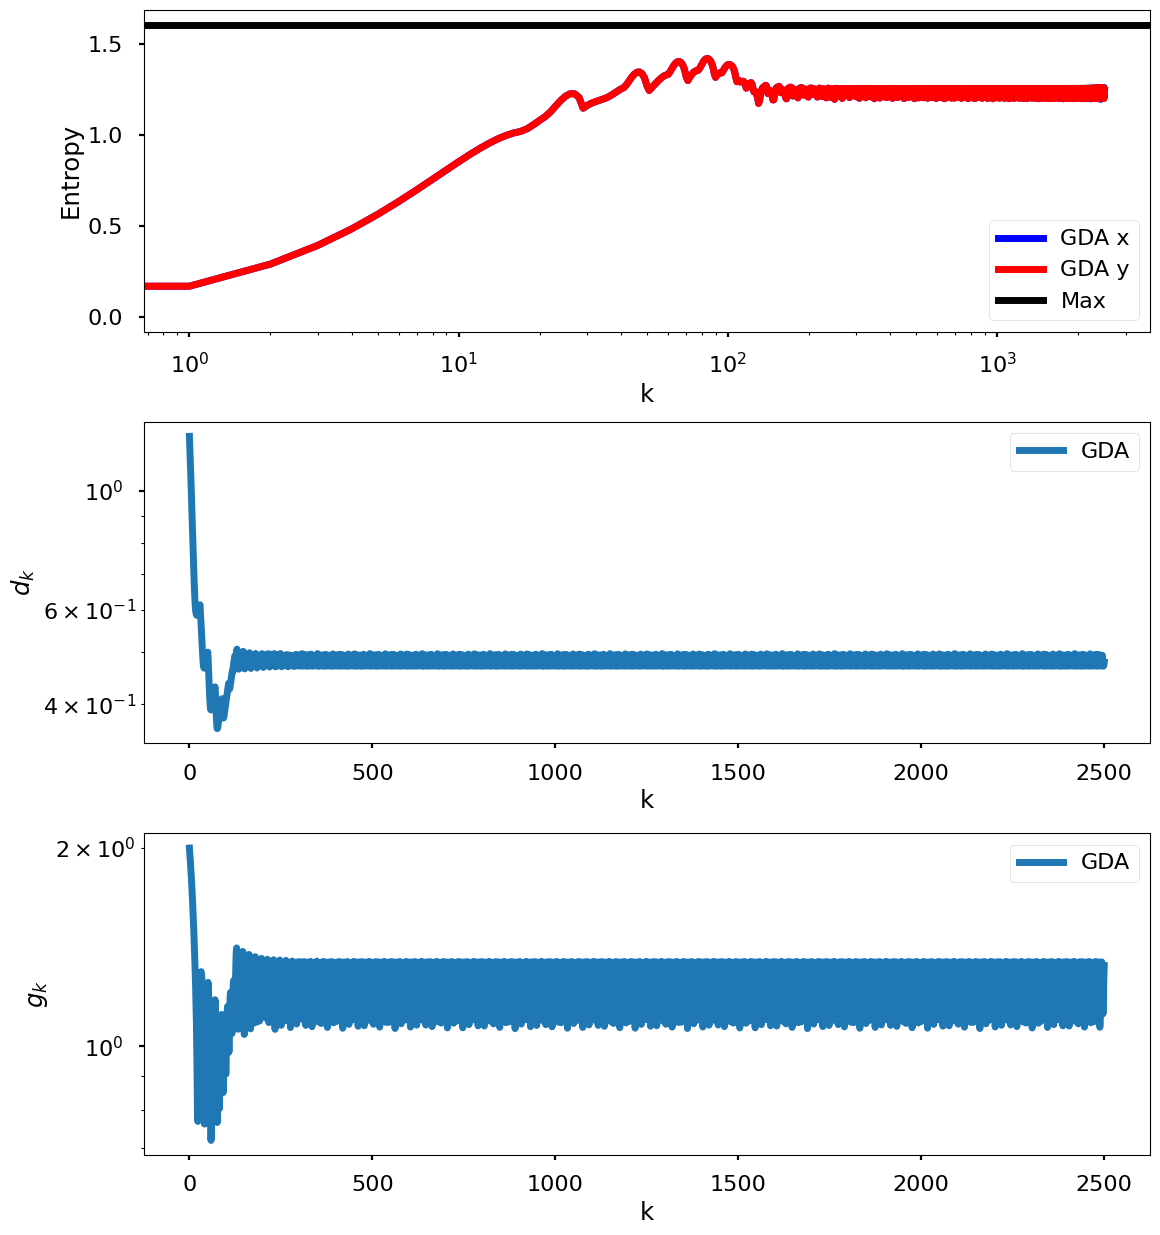

(array([0.08025897, 0.39854574, 0.00178339, 0.17692733, 0.34248456],
       dtype=float32),
 array([0.07870279, 0.3957969 , 0.00260824, 0.17016327, 0.35272872],
       dtype=float32))

In [65]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', label="GDA y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

gda_x_sequence[-1], gda_y_sequence[-1]

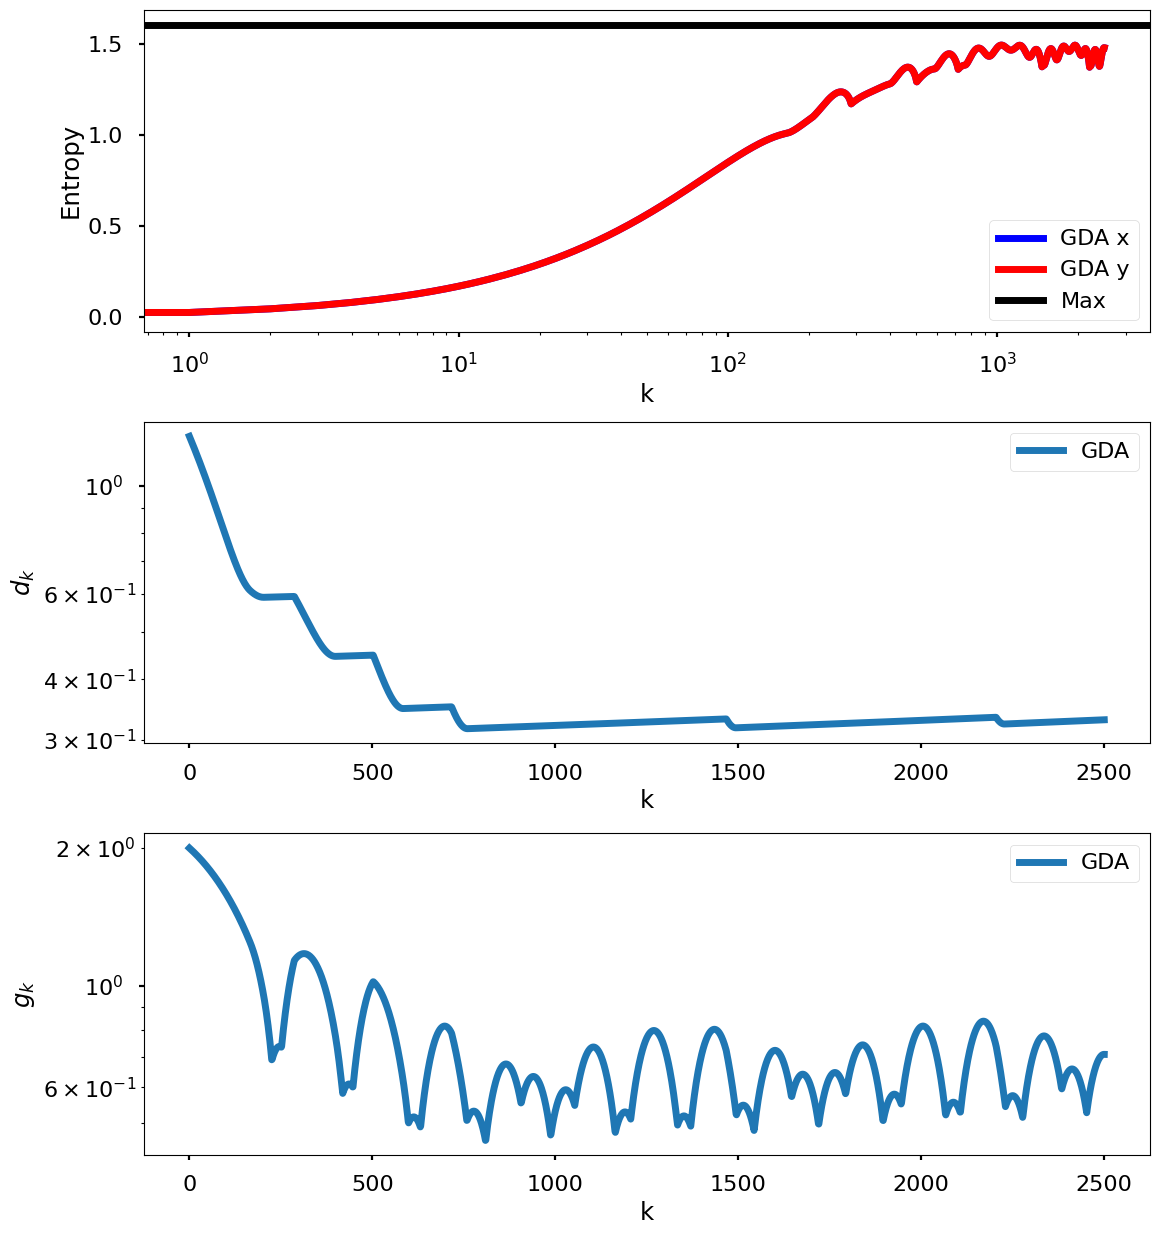

(array([0.38561124, 0.16853423, 0.23395564, 0.09703381, 0.11486512],
       dtype=float32),
 array([0.38561115, 0.16853432, 0.23395571, 0.09703374, 0.11486512],
       dtype=float32))

In [66]:
gda_x_sequence, gda_y_sequence = run_alg(GDA, f, x_init, y_init, step_size=0.005, n_iterations=2500)

plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', label="GDA y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

gda_x_sequence[-1], gda_y_sequence[-1]

**(3)** (3 point) What kind of behavior do you observe ? Do the iterates converge ? Play with the step_size and the number of iterations.




* A low entropy implies that the strategy is deterministic, i.e., the player gives higher probability to a particular action. We observe the entropy increasing with the number of iterations, which suggest that the strategy becomes more random. Max entropy is achieved at a uniform distribution. We are not achieving uniform distribution, which is the optimal strategy, and we are clearly not converging.
* dk and gk seem to increase and decrease indefinitely as if the algorithm was stuck in a loop. If g approaches 0 both players will be playing optimally. The algorithm converges as d approaches 0. Neither is happening.
* The smaller step_size, the further the $d_k$ gets to 0 (for example take 0.005). Still, it does not converge, and the loop it gets stuck in might be closer to the optimum. Looking at the player's strategies, they appear to be closer to a uniform distribution with the smaller learning rate, but it's still far from optimal.

**(4)** (10 points) As you've shown both theoretically and in practice, simultaneous Gradient Descent Ascent (sGDA) cannot solve the problem. You will now implement `ExtraGradient` (EG), an algorithm that can solve bilinear games. We will denote the projection onto the decision space of the x-player and y-player, $\Pi_{\mathcal X}$ and $\Pi_{\mathcal Y}$, respectively.

As discussed in class, the idea behind extra-gradient is to approximate an implicit update with a more tractable one. 

Let $\mathbf{z}_k = \begin{bmatrix} x_k \\ y_k \end{bmatrix}$, $\Pi(\mathbf{z})=\begin{bmatrix} \Pi_{\mathcal X}(x) \\ \Pi_{\mathcal Y}(y) \end{bmatrix}$ and $G(\mathbf{z}_k) = \begin{bmatrix} \nabla_x f(x_k,y_k) \\ -\nabla_y f(x_k,y_k) \end{bmatrix}$.

Consider the following implicit updates:
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{red}{\mathbf{z}_{k+1}})) \nonumber
\end{equation}

Computing the next iterate $\mathbf{z}_{k+1}$ requires you to solve a fixed point problem because we are evaluating the gradient at the unknown next iterate.  As this is too costly, we circumvent this difficulty by doing an _extrapolation_ step. Define the half steps:

\begin{equation}
    \mathbf{z}_{k+1/2} = \Pi(\mathbf{z}_k - \gamma G(\mathbf{z}_k)) \nonumber
\end{equation}

These half step extrapolation variables will help us to approximate the implicit iterates. We can then write
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k+1/2}})) \nonumber
\end{equation}
The recursion above defines the EG algorithm.


In [67]:
def ExtraGradient(f, x, y, step_size):
    x.requires_grad = True
    y.requires_grad = True

    payoff = f(x, y)
    payoff.backward()

    with torch.no_grad():
        inter_x = x - step_size * x.grad
        inter_y = y + step_size * y.grad

        simplex_project(inter_x)
        simplex_project(inter_y)

    inter_x.requires_grad = True
    inter_y.requires_grad = True
    inter_payoff = f(inter_x, inter_y)
    inter_payoff.backward()

    with torch.no_grad():
        x.add_(-step_size * inter_x.grad)
        y.add_(step_size * inter_y.grad)

        simplex_project(x)
        simplex_project(y)

    x.grad.zero_()
    y.grad.zero_()

In [68]:
eg_x_sequence, eg_y_sequence = run_alg(ExtraGradient, f, x_init, y_init, step_size=0.1, n_iterations=2500)

In [69]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(eg_x_sequence[:, dim_pairs[dim_pair]], 
                  eg_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

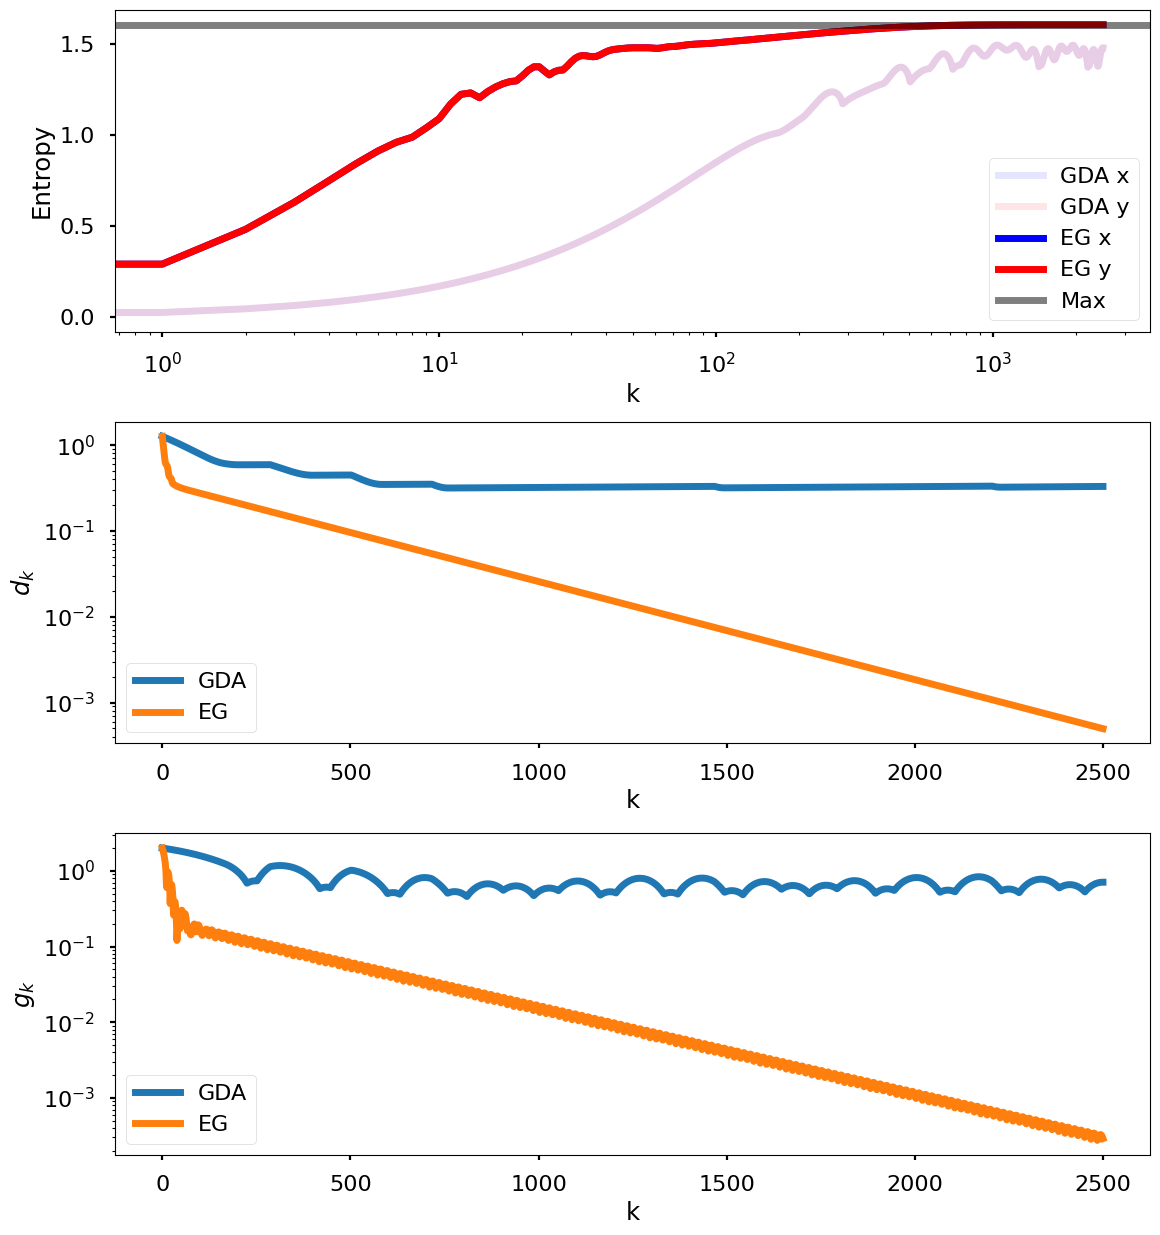

In [70]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', alpha=0.1, label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', alpha=0.1, label="GDA y")
ax[0].plot(range(len(eg_x_sequence)), entropy(eg_x_sequence, axis=1), lw=5, color='b', label="EG x")
ax[0].plot(range(len(eg_y_sequence)), entropy(eg_y_sequence, axis=1), lw=5, color='r', label="EG y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].plot(range(len(eg_x_sequence)), distance_to_opt(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(eg_x_sequence)), duality_gap(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(BONUS)** What can you observe about the optimal solution? What properties does the optimal Rock-Paper-Scissors-Lizard-Spock strategy have? Prove that extra-gradient in the bilinear case doesn't diverge like GDA. (Again, candy reward for correct answers!)




In [71]:
eg_x_sequence[-1], eg_y_sequence[-1] # uniform distribution

(array([0.19983971, 0.19980447, 0.20003949, 0.20009646, 0.2002199 ],
       dtype=float32),
 array([0.1998397 , 0.1998046 , 0.20003954, 0.20009635, 0.20021987],
       dtype=float32))

It is almost uniform, so we are satisfied

Well yes EG seems to converge :) 


**(5)** (10 points) It turns out that we can _generalize_ the ExtraGradient method naturally by striving for a bit more accurate extrapolation. Namely, instead of always performing 1 extrapolation step updating half-iterates before the main parameter update, we can perform $m\geq 1$ fractional steps. Implement this ClairvoyantExtraGradient (CEG) method [1], with the precise update step formulas given below:

\begin{equation}
    \mathbf{z}_{k+1(\color{green}{1/m+1})} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k}})) \\
    \mathbf{z}_{k+1(\color{green}{2/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{1/m+1})})) \\
    \vdots \\
    \mathbf{z}_{k+1(\color{green}{m/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{m-1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{m-1/m+1})})) \\
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G({\mathbf{z}_{k+1(\color{green}{m/m+1})} })) \nonumber
\end{equation}


[1] Cevher, Volkan, Georgios Piliouras, Ryann Sim, and Stratis Skoulakis. “Min-Max Optimization Made Simple: Approximating the Proximal Point Method via Contraction Maps.” In 2023 Symposium on Simplicity in Algorithms (SOSA), 192–206. Proceedings. Society for Industrial and Applied Mathematics, 2023. https://doi.org/10.1137/1.9781611977585.ch18.

In [72]:
def ClairvoyantExtraGradient(f, x, y, step_size, m=1):
    frac_i_x = x.clone().detach().requires_grad_(True)
    frac_i_y = y.clone().detach().requires_grad_(True)
    
    for i in range(m):
        payoff_i = f(frac_i_x, frac_i_y)
        payoff_i.backward()
        
        with torch.no_grad():
            frac_i_x.add_(- step_size * frac_i_x.grad)
            frac_i_y.add_(step_size * frac_i_y.grad)

            simplex_project(frac_i_x)
            simplex_project(frac_i_y)

        frac_i_x.grad.zero_()
        frac_i_y.grad.zero_()

    payoff_m = f(frac_i_x, frac_i_y)
    payoff_m.backward()

    with torch.no_grad():
        x.add_(- step_size * frac_i_x.grad)
        y.add_(step_size * frac_i_y.grad)

        simplex_project(x)
        simplex_project(y)

In [85]:
m_values = [1, 2, 3, 5, 10, 25] # You can change this if you wish
ceg_x_sequences, ceg_y_sequences = [], []
for m in m_values:
    print("m =", m)
    step_size = 0.1 if m != 10 else 0.09 # You can change this if you wish
    ceg_x_sequence, ceg_y_sequence = run_alg(ClairvoyantExtraGradient, f, x_init, y_init, 
                                             n_iterations=2500, step_size=step_size, m=m)
    ceg_x_sequences.append(ceg_x_sequence)
    ceg_y_sequences.append(ceg_y_sequence)

m = 1
m = 2
m = 3
m = 5
m = 10
m = 25


In [86]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(L_x, L_y, dim_pair):
    visualize_seq(L_x[:, dim_pairs[dim_pair]], 
                  L_y[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    print("m =", m)
    interact(visualize_seq_slice, L_x=fixed(ceg_x_sequence), L_y=fixed(ceg_y_sequence), dim_pair=SelectionSlider(
        options=range(len(dim_pairs)),
        value=0,
        description="Dim pair:",
        disabled=False,
        continuous_update=False,
        orientation="horizontal",
        readout=True
    ))

m = 1


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 2


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 3


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 5


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 10


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 25


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

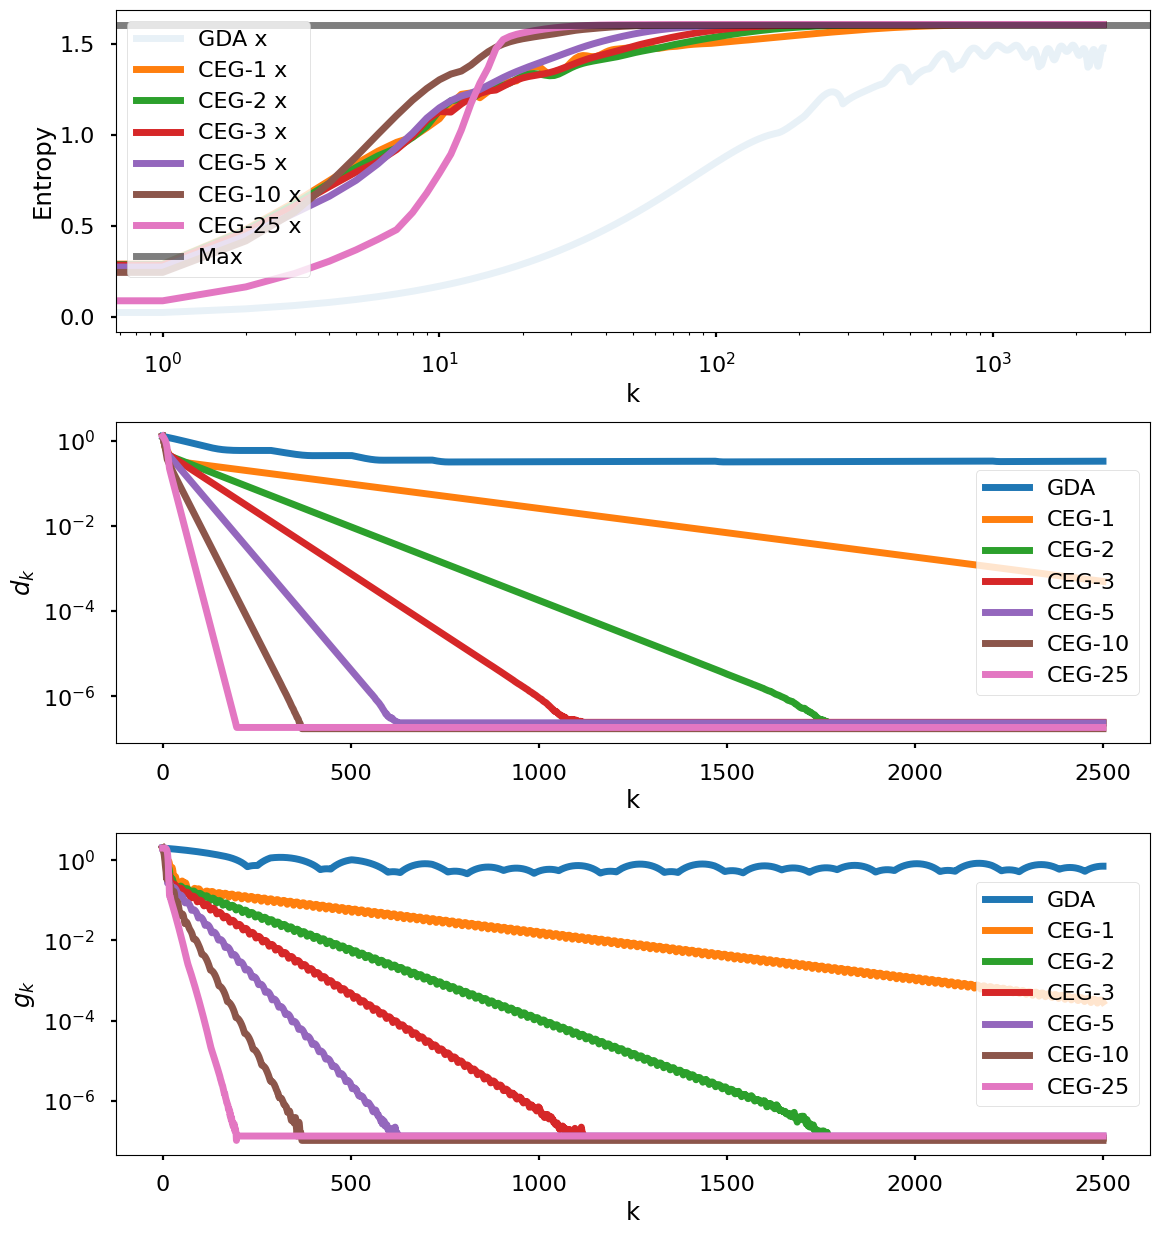

In [87]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, alpha=0.1, label="GDA x")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    ax[0].plot(range(len(ceg_x_sequence)), entropy(ceg_x_sequence, axis=1), lw=5, label=f"CEG-{m} x")
    ax[1].plot(range(len(ceg_x_sequence)), distance_to_opt(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
    ax[2].plot(range(len(ceg_x_sequence)), duality_gap(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()
fig.tight_layout()
plt.show()

**(6)** (5 points) Discuss what you observe for the CEG runs. How do the value of $m$ and the step size influence the convergence and the computation cost? Is there a sweet spot?




* We clearly see that increase of m results in better convergence. With $m=25$ the algorithm seems to take longer to ramp up, but then converges faster than smaller values of $m$. In contrast, looking at g and d, the lines are steeper as we increase $m$.
* We do $m$ fractional iterations at each iteration of the Clarivoyant Extra Gradient method. The asymptotic cost of the algorithm is $O(m \cdot \text{cost-per-iteration})$
* With a smaller step-size of $\alpha=0.01$ we observed much slower convergence, and no ramp-up for larger values of $m$. Doubling the original step-size to $\alpha=0.2$, we lose convergence for $m \geq 5$, and with $\alpha=0.5$, no CEG configuration converges.